# **Customer Travel Experience**


## Business Problem 

Objective:
The Tour & Travels company is experiencing challenges in retaining its customers, which leads to significant financial losses. The company seeks to predict customer churn based on various factors, including demographic information, service usage, and engagement with the company's offerings. By developing a predictive model, the company aims to proactively identify customers at risk of churning and implement targeted retention strategies to reduce customer attrition and save costs.

Dataset Overview:
The dataset contains the following features:

Age: The age of the customer.
FrequentFlyer: Indicates whether the customer is enrolled in a frequent flyer program.
AnnualIncomeClass: The income category of the customer.
ServicesOpted: The services used by the customer.
AccountSyncedToSocialMedia: Indicates whether the customer's account is synced to social media.
BookedHotelOrNot: Indicates whether the customer has booked a hotel through the company's platform.
Target: The target variable indicating whether the customer churned (1) or not (0).
Goal:
The goal is to build a robust predictive model using machine learning techniques to accurately classify customers as potential churners or loyal customers. This model will help the Tour & Travels company implement preemptive measures to retain customers and minimize revenue loss.

Expected Outcome:
The project aims to deliver a predictive model that:

Identifies key indicators contributing to customer churn.
Provides actionable insights for customer retention strategies.
Improves the company's ability to retain customers, ultimately increasing profitability.
This solution will empower the company to allocate resources more effectively and enhance overall customer satisfaction.


## 1. Business Understanding

The primary objective of this project is to reduce customer churn by leveraging data analytics and predictive modeling. By accurately predicting which customers are at risk of churning, the company can:

Implement Targeted Retention Campaigns: Develop personalized offers and services for at-risk customers to improve retention.
Optimize Marketing Spend: Allocate resources more efficiently by focusing on customers with a higher likelihood of staying.
Increase Customer Lifetime Value (CLV): Retain customers for a longer duration, thereby enhancing their overall contribution to the company's revenue.
Key Success Metrics: To measure the success of this project, the following key performance indicators (KPIs) will be considered:

Churn Prediction Accuracy: The ability of the predictive model to correctly identify customers who will churn.
Reduction in Churn Rate: A decrease in the overall churn rate after implementing the model’s insights.
Retention Campaign ROI: The return on investment from retention campaigns driven by the model's predictions.
Customer Lifetime Value (CLV) Improvement: An increase in the average CLV as a result of reduced churn.
Strategic Impact: Successfully predicting customer churn and taking proactive measures will enable the company to:

Enhance customer loyalty and satisfaction.
Maintain a competitive edge in the market by reducing customer attrition.
Improve overall business profitability by retaining more customers and reducing the costs associated with acquiring new ones.



## 2. Data Understanding
customers of a Tour & Travels company, aiming to help predict whether a customer will churn or not. The features in the dataset include:

Age: The age of the customer.
FrequentFlyer: Indicates whether the customer is enrolled in a frequent flyer program (Yes/No).
AnnualIncomeClass: The income category of the customer (e.g., Low, Medium, High).
ServicesOpted: The specific services used by the customer (e.g., Flights, Hotels).
AccountSyncedToSocialMedia: Indicates whether the customer's account is linked to social media (Yes/No).
BookedHotelOrNot: Indicates whether the customer has booked a hotel through the company's platform (Yes/No).
Target: The target variable indicating whether the customer churned (1) or not (0).
This dataset will be used to develop a predictive model to identify customers who are at risk of churning, helping the company take preventive actions.


## 3. Data Preparation

In [114]:
import pandas as pd 
import numpy as np
import scipy as stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [64]:
data = pd.read_csv("Customertravel.csv")
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [66]:
data.shape

(954, 7)

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [68]:
data["Age"].mean()

32.109014675052414

In [69]:
data['FrequentFlyer'].value_counts()

FrequentFlyer
No           608
Yes          286
No Record     60
Name: count, dtype: int64

In [70]:
data['AnnualIncomeClass'].value_counts()

AnnualIncomeClass
Middle Income    409
Low Income       386
High Income      159
Name: count, dtype: int64

In [71]:
data['BookedHotelOrNot'].value_counts()

BookedHotelOrNot
No     576
Yes    378
Name: count, dtype: int64

#### Class Balance

In [72]:
data['Target'].value_counts()

Target
0    730
1    224
Name: count, dtype: int64

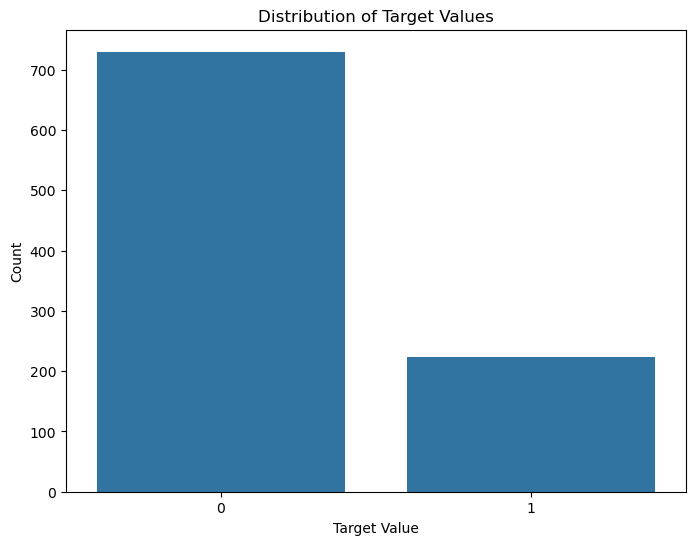

In [106]:
target_counts = data['Target'].value_counts()

# Create a bar chart to visualize the value counts
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

### Data Cleaning

In [73]:
data.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [74]:
data.duplicated().sum()

507

In [75]:
data.T.duplicated()


Age                           False
FrequentFlyer                 False
AnnualIncomeClass             False
ServicesOpted                 False
AccountSyncedToSocialMedia    False
BookedHotelOrNot              False
Target                        False
dtype: bool

In [76]:
data.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

## Exploratory Data Analysis

In [77]:
number = LabelEncoder()
features = ['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']
for f in features:
    data[f] = number.fit_transform(data[f])
data.head()


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


### Univariate Analysis

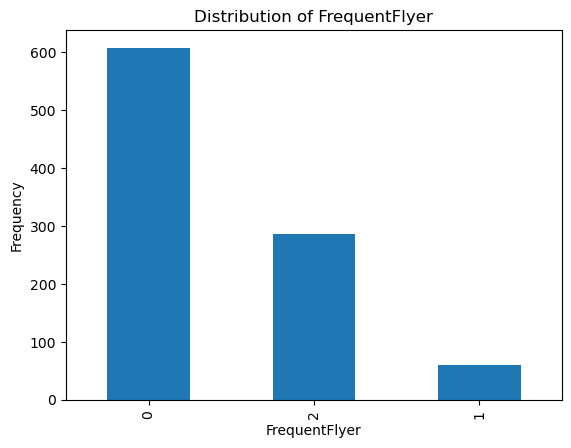

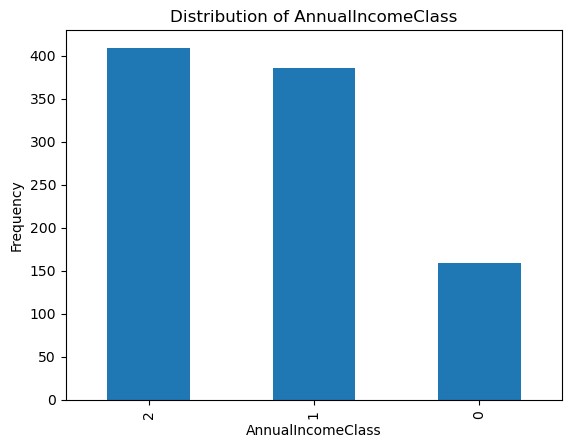

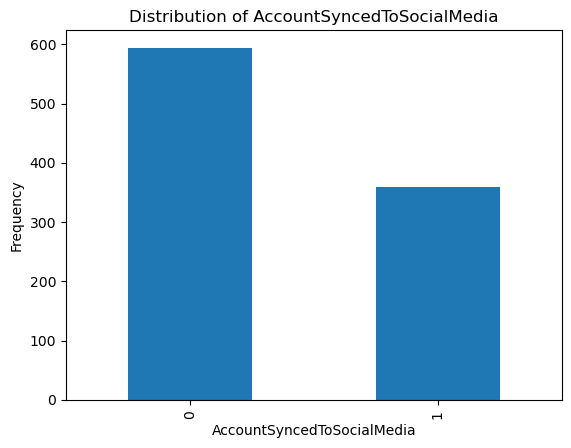

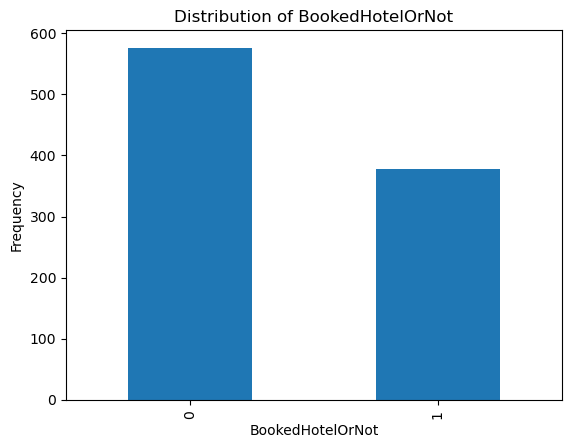

In [80]:
# Bar chart for categorical columns
categorical_cols = ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']
for col in categorical_cols:
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Bivariate Analysis

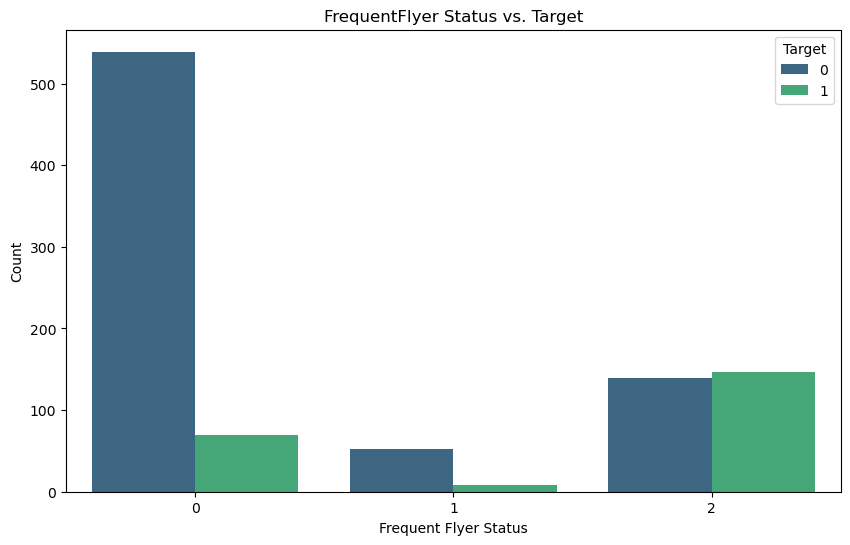

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='FrequentFlyer', hue='Target', palette='viridis')
plt.title('FrequentFlyer Status vs. Target')
plt.xlabel('Frequent Flyer Status')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


### Multivariate Analysis

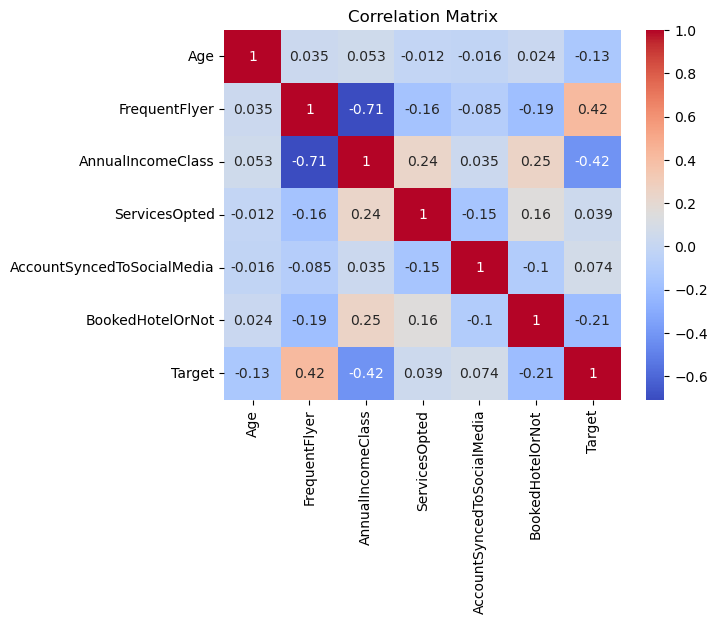

In [93]:
# Correlation matrix for numerical columns
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


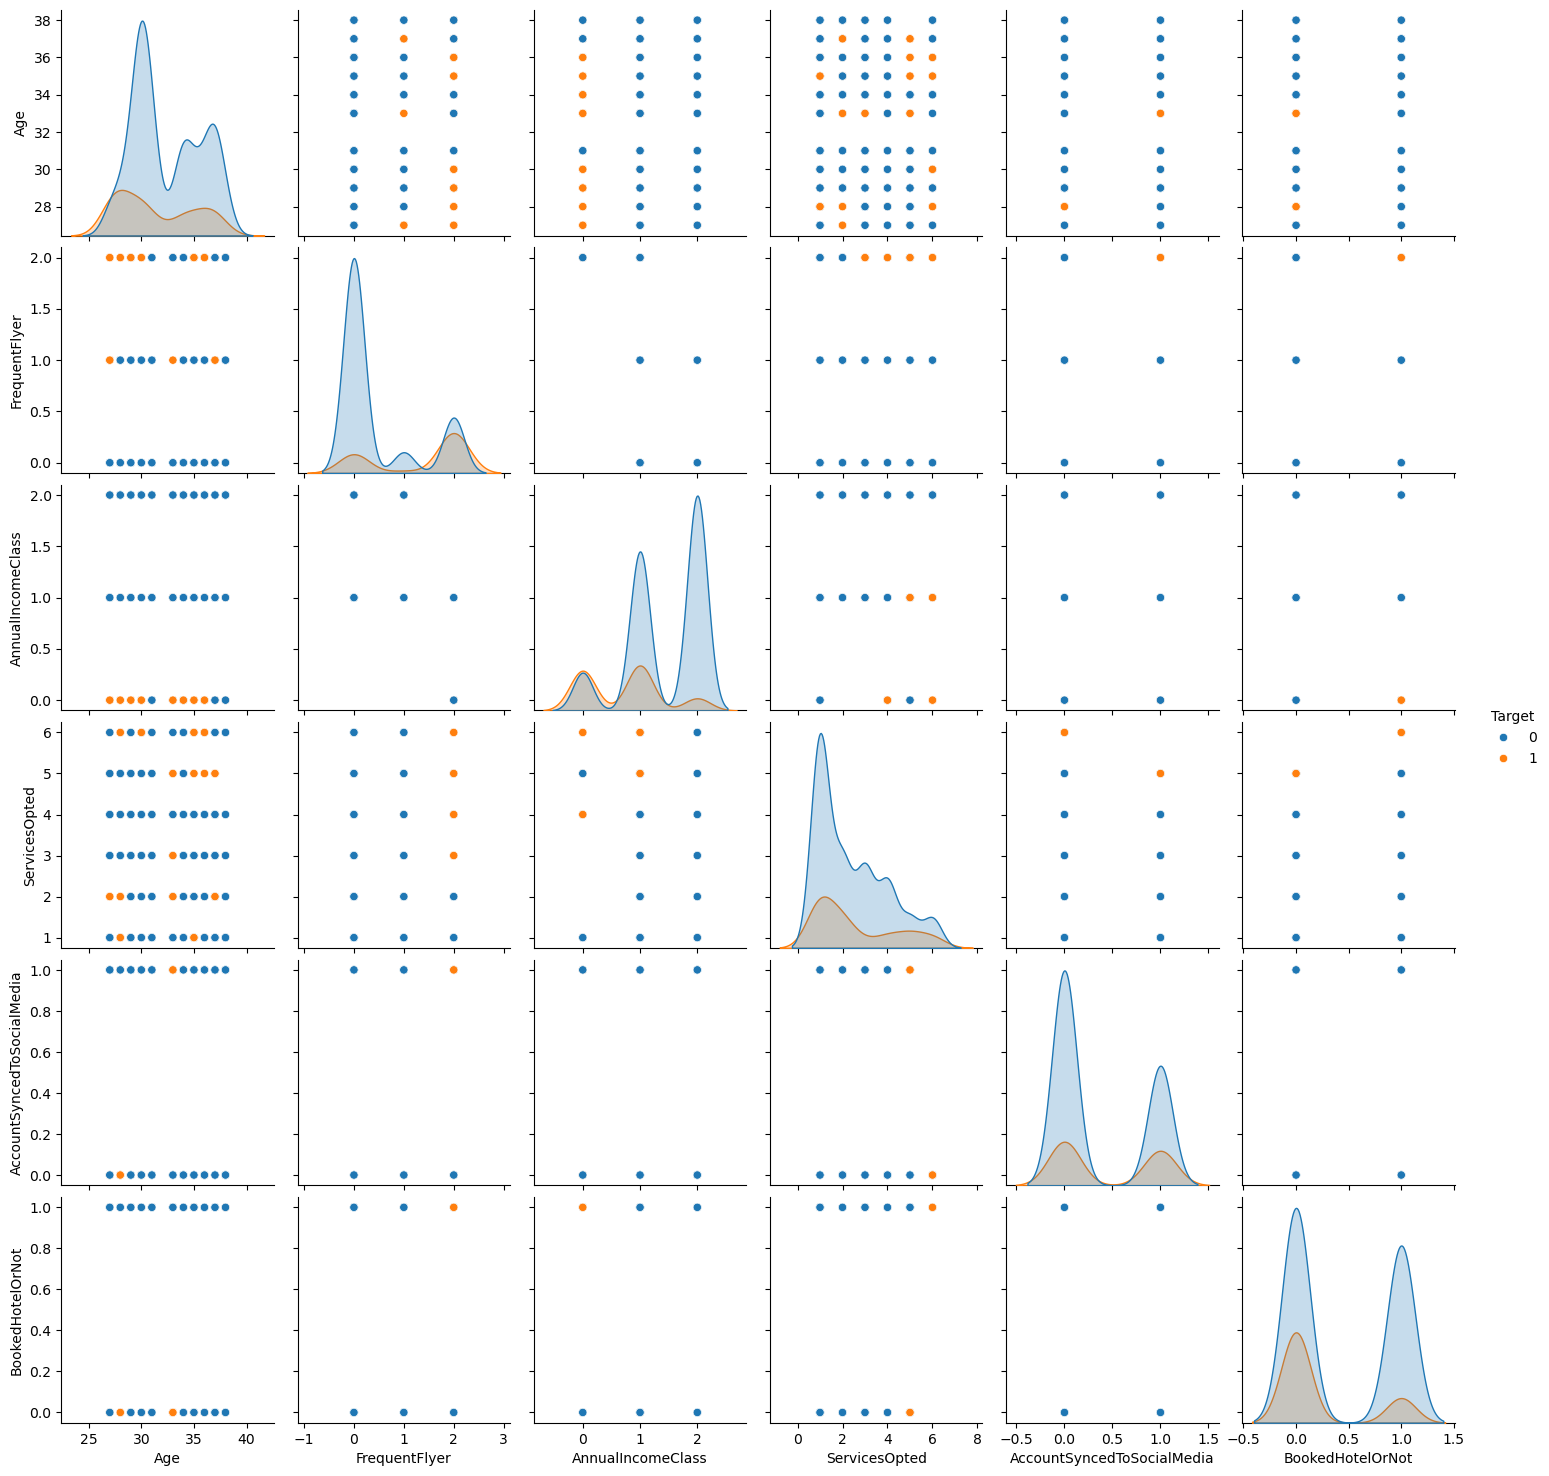

In [112]:
# Pairplot for all numerical variables
sns.pairplot(data, hue='Target')
plt.show()

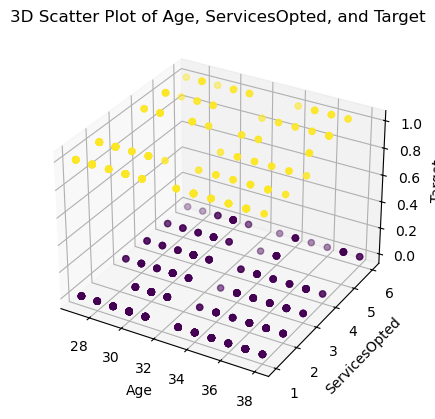

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot
ax.scatter(data['Age'], data['ServicesOpted'], data['Target'], c=data['Target'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('ServicesOpted')
ax.set_zlabel('Target')
plt.title('3D Scatter Plot of Age, ServicesOpted, and Target')
plt.show()


# **Modeling**

## Train Test Split

In [115]:

X = data.drop(columns=['Target'])  # Features (independent variables)
y = data['Target']  # Target (dependent variable)


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [117]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (667, 6)
X_test shape: (287, 6)
y_train shape: (667,)
y_test shape: (287,)


### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [119]:
# Initialize the model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LogisticRegression()

In [120]:
# Predict on the test data
y_pred = model.predict(X_test)


In [122]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8432055749128919
Confusion Matrix:
 [[209  10]
 [ 35  33]]


### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [125]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


In [126]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)

Random Forest Accuracy: 0.8780487804878049
Random Forest Confusion Matrix:
 [[207  12]
 [ 23  45]]


#### feature importances

In [127]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)


                            Importance
Age                           0.307053
ServicesOpted                 0.219657
FrequentFlyer                 0.170118
AnnualIncomeClass             0.144194
AccountSyncedToSocialMedia    0.112378
BookedHotelOrNot              0.046600


### Hyperparameter Tuning

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [129]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [130]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [131]:
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Random Forest Accuracy:", accuracy_best)

cm_best = confusion_matrix(y_test, y_pred_best)
print("Best Random Forest Confusion Matrix:\n", cm_best)

Best Random Forest Accuracy: 0.8780487804878049
Best Random Forest Confusion Matrix:
 [[209  10]
 [ 25  43]]
